# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    response = requests.get(base_url + city)
    if response.status_code == 200:
        print(f"Processing Record {cities.index(city) + 1} of {len(cities)} | {city}")
        data = response.json()
        city_name.append(data['name'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        temperature.append(data['main']['temp'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
    else:
        print("City not found, skipping")

Processing Record 1 of 605 | shimoda
City not found, skipping
Processing Record 3 of 605 | stolin
Processing Record 4 of 605 | albany
Processing Record 5 of 605 | moranbah
Processing Record 6 of 605 | maputo
Processing Record 7 of 605 | port hedland
Processing Record 8 of 605 | sobolevo
Processing Record 9 of 605 | pangnirtung
City not found, skipping
Processing Record 11 of 605 | avarua
Processing Record 12 of 605 | mataura
Processing Record 13 of 605 | ancud
City not found, skipping
Processing Record 15 of 605 | bluff
Processing Record 16 of 605 | naze
Processing Record 17 of 605 | hartland
Processing Record 18 of 605 | bredasdorp
Processing Record 19 of 605 | tura
Processing Record 20 of 605 | ushuaia
Processing Record 21 of 605 | tasiilaq
Processing Record 22 of 605 | cherskiy
Processing Record 23 of 605 | aykhal
Processing Record 24 of 605 | rikitea
Processing Record 25 of 605 | east london
Processing Record 26 of 605 | rundu
Processing Record 27 of 605 | geraldton
Processing Reco

Processing Record 213 of 605 | puerto madero
Processing Record 214 of 605 | bertoua
Processing Record 215 of 605 | fukue
Processing Record 216 of 605 | half moon bay
Processing Record 217 of 605 | aksu
Processing Record 218 of 605 | adrar
Processing Record 219 of 605 | kavaratti
Processing Record 220 of 605 | taoudenni
Processing Record 221 of 605 | pokhara
Processing Record 222 of 605 | neusiedl am see
Processing Record 223 of 605 | longyearbyen
Processing Record 224 of 605 | oulainen
Processing Record 225 of 605 | bindura
Processing Record 226 of 605 | voh
Processing Record 227 of 605 | constitucion
Processing Record 228 of 605 | ariquemes
Processing Record 229 of 605 | vardo
Processing Record 230 of 605 | lincoln
Processing Record 231 of 605 | lompoc
Processing Record 232 of 605 | ardesen
Processing Record 233 of 605 | winneba
Processing Record 234 of 605 | jumla
Processing Record 235 of 605 | port blair
Processing Record 236 of 605 | yuzhno-sukhokumsk
City not found, skipping
Proce

Processing Record 424 of 605 | zapolyarnyy
Processing Record 425 of 605 | kungurtug
Processing Record 426 of 605 | lake charles
Processing Record 427 of 605 | talara
Processing Record 428 of 605 | saint paul
Processing Record 429 of 605 | luanda
Processing Record 430 of 605 | manaus
Processing Record 431 of 605 | plouzane
Processing Record 432 of 605 | cururupu
Processing Record 433 of 605 | camaqua
Processing Record 434 of 605 | chongoyape
Processing Record 435 of 605 | saint anthony
Processing Record 436 of 605 | ascoli piceno
Processing Record 437 of 605 | cayenne
Processing Record 438 of 605 | shache
Processing Record 439 of 605 | nkhotakota
Processing Record 440 of 605 | bojnurd
Processing Record 441 of 605 | durban
Processing Record 442 of 605 | suntar
Processing Record 443 of 605 | padang
Processing Record 444 of 605 | acari
Processing Record 445 of 605 | tiznit
Processing Record 446 of 605 | harper
Processing Record 447 of 605 | halifax
Processing Record 448 of 605 | kashirskoy

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
# Create Data-Frame
df = pd.DataFrame({
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Humidity": humidity,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": temperature,
    "Wind Speed": wind_speed
})
# Write date to file
df.to_csv(output_data_file, header=True, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [59]:
# Function to generate a scatter plot against given x and y data series
def make_plot(x_axis, y_axis, title, xlabel, ylabel, fig_filename):
    fig, ax1 = plt.subplots()
    ax1.scatter(x_axis, y_axis, marker="o")
    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    plt.grid()
    plt.savefig(fig_filename)
    plt.show()

#### Latitude vs. Temperature Plot

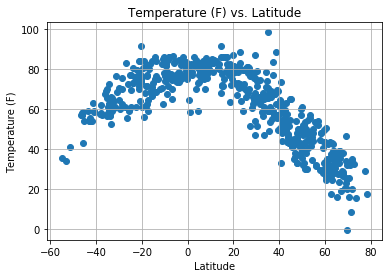

In [31]:
lat_x = df['Latitude']
temp_y = df['Temperature']
make_plot(lat_x, temp_y, "Temperature (F) vs. Latitude", "Latitude", "Temperature (F)","output_data/Lat_vs_Temp.png")

## CONCLUSION ## 
# This plot shows that temperatures are higher near the equator
# then they go down as we move farther from the equator

#### Latitude vs. Humidity Plot

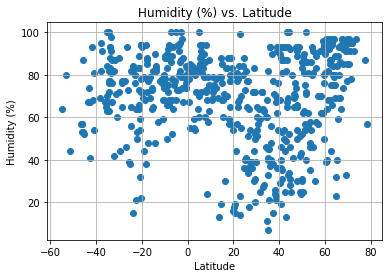

In [34]:
hum_y = df['Humidity']
generate_plot(lat_x, hum_y, "Humidity (%) vs. Latitude", "Latitude", "Humidity (%)","output_data/Lat_vs_Humidity.png")

## CONCLUSION ## 
# This plot shows that there is no correlation of humidity from distance from equater
# Cities in the Northern hemisphere have higher levels of humidity

#### Latitude vs. Cloudiness Plot

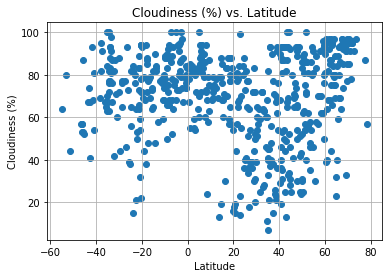

In [35]:
cloud_y = df['Humidity']
generate_plot(lat_x, cloud_y, "Cloudiness (%) vs. Latitude", "Latitude", "Cloudiness (%)","output_data/Lat_vs_Cloudiness.png")

## CONCLUSION ## 
# This plot shows that there is more cloudiness as we move away from the equator, especially in the Northern hemisphere.

#### Latitude vs. Wind Speed Plot

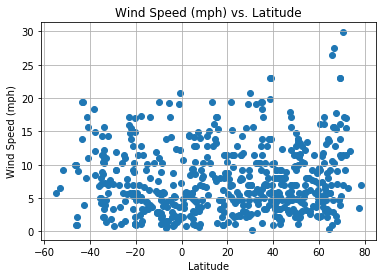

In [63]:
wind_y = df['Wind Speed']
generate_plot(lat_x, wind_y, "Wind Speed (mph) vs. Latitude", "Latitude", "Wind Speed (mph)","output_data/Lat_vs_Wind.png")

## CONCLUSION ## 
# This plot shows that wind speeds are less near the equator and more farther away
# Most of the cities have wind speeds under 20 mph.

## Linear Regression

In [64]:
# OPTIONAL: Create a function to create Linear Regression plots
def generate_regression_plot(x_axis, y_axis, title, xlabel, ylabel):
    correlation = st.pearsonr(x_axis,y_axis)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-", label=line_eq)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-squared is: {correlation[0]}")
    plt.grid()
    plt.legend(loc="best")
    plt.show()

In [65]:
# Create Northern and Southern Hemisphere DataFrames
df_north = df.loc[df['Latitude'] >= 0]
df_south = df.loc[df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8917127309401855


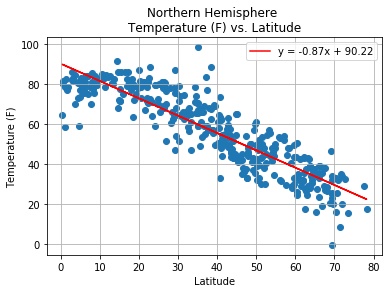

In [67]:
lat_x_north = df_north['Latitude']
temp_y_north = df_north['Max Temperature']
generate_regression_plot(lat_x_north, temp_y_north, "Northern Hemisphere \nTemperature (F) vs. Latitude", "Latitude", "Temperature (F)")

## CONCLUSION ## 
# In this plot, there is a negative correlation between latitude and temperature
# which shows that as latitude increases, temperatures drop.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7697262135763476


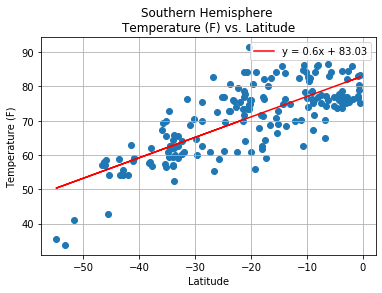

In [69]:
lat_x_south = df_south['Latitude']
temp_y_south = df_south['Max Temperature']
generate_regression_plot(lat_x_south, temp_y_south, "Southern Hemisphere \nTemperature (F) vs. Latitude", "Latitude", "Temperature (F)")

## CONCLUSION ## 
# In this plot, there is a positive correlation between latitude and temperature
# which shows that as latitude increases, temperatures increase.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12563546160040578


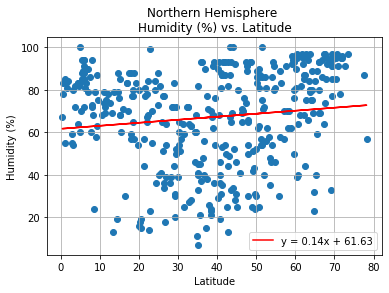

In [70]:
hum_y_north = df_north['Humidity']
generate_regression_plot(lat_x_north, hum_y_north, "Northern Hemisphere \nHumidity (%) vs. Latitude", "Latitude", "Humidity (%)")

## CONCLUSION ## 
# In this plot, there is a weak positive correlation between latitude and humidity
# which shows that as latitude increases, humidity will probably increase.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2263518461206297


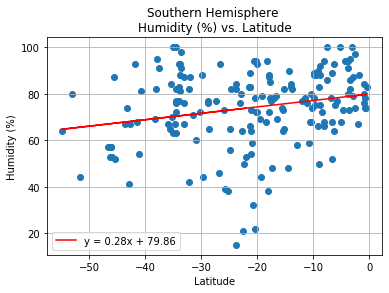

In [71]:
hum_y_south = df_south['Humidity']
generate_regression_plot(lat_x_south, hum_y_south, "Southern Hemisphere \nHumidity (%) vs. Latitude", "Latitude", "Humidity (%)")

## CONCLUSION ## 
# In this plot, there is a weak positive correlation between latitude and humidity
# which shows that as latitude increases, humidity will probably increase.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08785907812979045


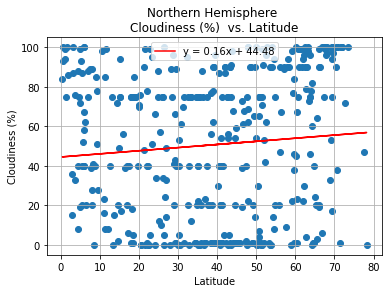

In [72]:
cloud_y_north = df_north['Cloudiness']
generate_regression_plot(lat_x_north, cloud_y_north, "Northern Hemisphere \nCloudiness (%)  vs. Latitude", "Latitude", "Cloudiness (%)")

## CONCLUSION ## 
# In this plot, there is a weak positive correlation between latitude and cloudiness
# which shows that as latitude increases, cloudiness will probably increase.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08564125655176759


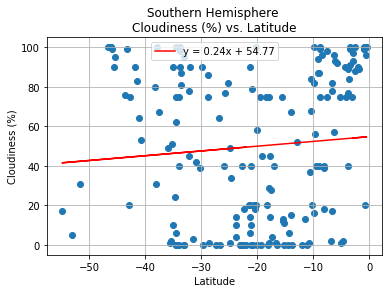

In [73]:
cloud_y_south = df_south['Cloudiness']
generate_regression_plot(lat_x_south, cloud_y_south, "Southern Hemisphere \nCloudiness (%) vs. Latitude", "Latitude", "Cloudiness (%)")

## CONCLUSION ## 
# In this plot, there is a weak positive correlation between latitude and cloudiness
# which shows that as latitude increases, cloudiness will probably increase.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11292757875389234


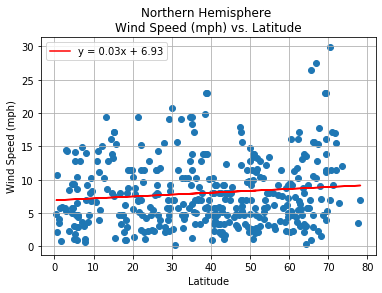

In [74]:
wind_y_north = df_north['Wind Speed']
generate_regression_plot(lat_x_north, wind_y_north, "Northern Hemisphere \nWind Speed (mph) vs. Latitude", "Latitude", "Wind Speed (mph)")

## CONCLUSION ## 
# In this plot, there is no correlation between latitude and wind speed
# which shows that distance from the equator does not impact the wind speeds.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.210029686252961


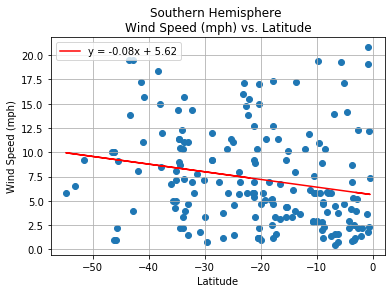

In [75]:
wind_y_south = df_south['Wind Speed']
generate_regression_plot(lat_x_south, wind_y_south, "Southern Hemisphere \nWind Speed (mph) vs. Latitude", "Latitude", "Wind Speed (mph)")

## CONCLUSION ## 
# In this plot, there is a weak negative correlation between latitude and wind speed
# which shows that as latitude increases, wind speed will probably decrease.